<h1>Titanic</h1>
<h2>Predicting Titanic Survivers</h2>
<p>Inspired by Donne Martin</p>

<h3>Setup Imports and Variables</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Loading the dataset</h3>

In [3]:
dataset = pd.read_csv('/home/xl/datasets/titanic.csv')

<h3>First look</h3>

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p>Findings:</p>
<ol>
    <li>'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.</li>
    <li>Age, Cabin, Embarked has missing data values</li>
    <li>Cabin has too many missing values to fill them</li>
    <li>Will explore possiblites to fill values for Age and Embarked</li>
</ol>

In [7]:
dataset[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<h3>Exploratory Analysis</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

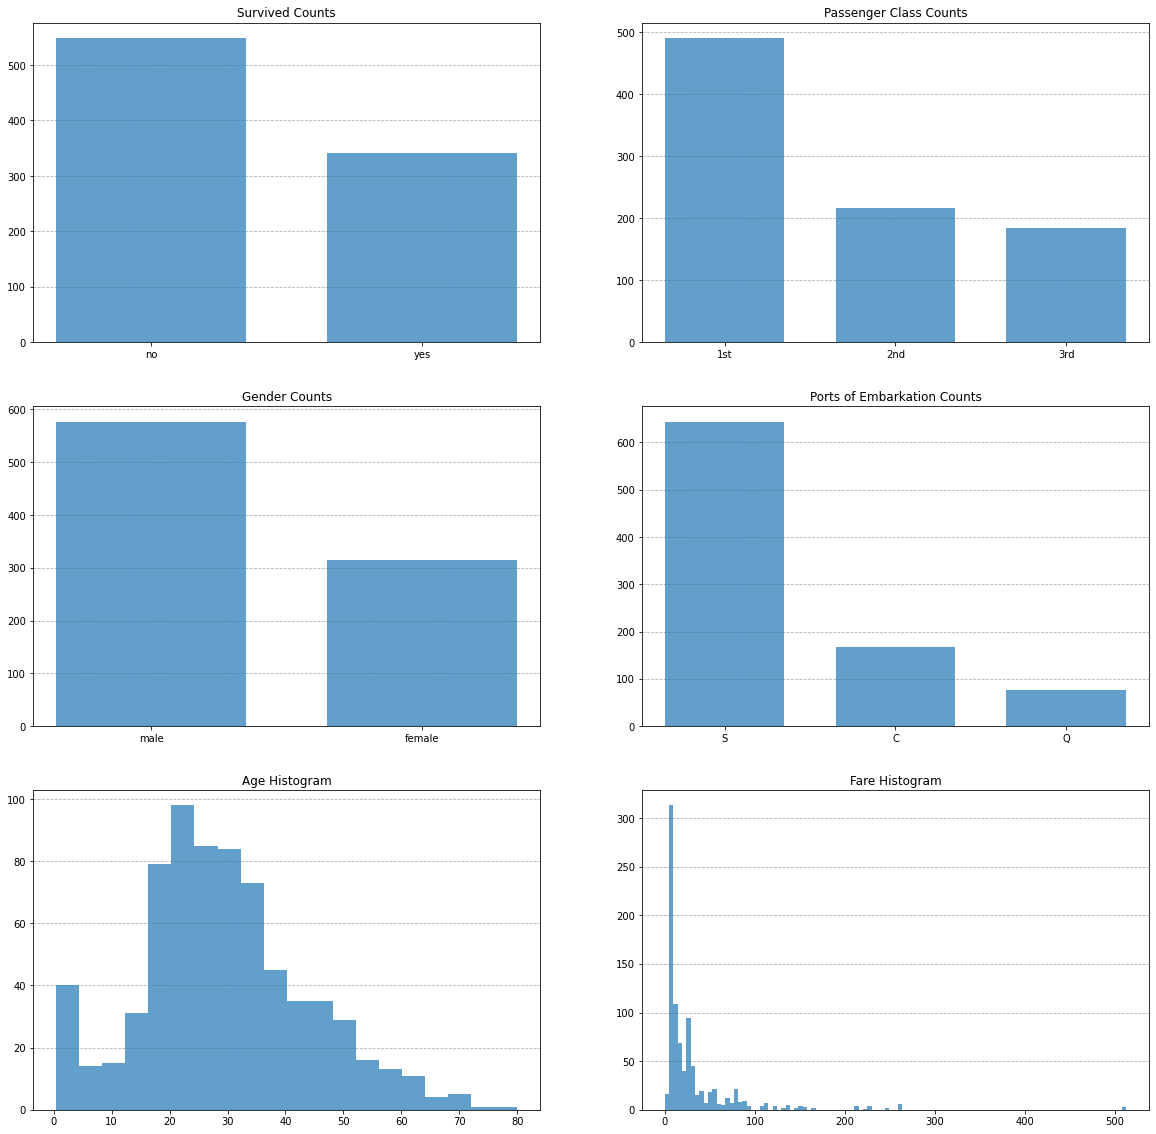

In [8]:
import matplotlib.gridspec as gridspec

# figure 
fig = plt.figure(figsize=(20,20)) 
# grid for multiple plots
gs = gridspec.GridSpec(3, 2)

# prepare survided data for plotting
survived = dataset['Survived'].value_counts().to_dict()
survived = dict(zip(['no', 'yes'], survived.values())) # change keys from 0,1 to no,yes
labels = list(survived.keys())
values = list(survived.values())
# plot
ax1 = fig.add_subplot(gs[0])
ax1.set_title('Survived Counts')
ax1.bar(labels, values, width=0.7, alpha=0.7)
ax1.set_axisbelow(True) # grid in background
ax1.yaxis.grid(True, linestyle='--')

# prepare passenger class  data for plotting
passengerclass = dataset['Pclass'].value_counts().to_dict()
passengerclass = dict(zip(['1st', '2nd', '3rd'], passengerclass.values())) # change keys from 0,1 to no,yes
labels = list(passengerclass.keys())
values = list(passengerclass.values())
# plot
ax2 = fig.add_subplot(gs[1])
ax2.set_title('Passenger Class Counts')
ax2.bar(labels, values, width=0.7, alpha=0.7)
ax2.set_axisbelow(True) # grid in background
ax2.yaxis.grid(True, linestyle='--')

# prepare gender data for plotting
gender= dataset['Sex'].value_counts().to_dict()
labels = list(gender.keys())
values = list(gender.values())
# plot
ax3 = fig.add_subplot(gs[2])
ax3.set_title('Gender Counts')
ax3.bar(labels, values, width=0.7, alpha=0.7)
ax3.set_axisbelow(True) # grid in background
ax3.yaxis.grid(True, linestyle='--')

# prepare embarked ports data for plotting
embarked = dataset['Embarked'].value_counts().to_dict()
labels = list(embarked.keys())
values = list(embarked.values())
# plot
ax4 = fig.add_subplot(gs[3])
ax4.set_title('Ports of Embarkation Counts')
ax4.bar(labels, values, width=0.7, alpha=0.7)
ax4.set_axisbelow(True) # grid in background
ax4.yaxis.grid(True, linestyle='--')

# Age histogram
ax5 = fig.add_subplot(gs[4])
ax5.set_title('Age Histogram')
ax5.hist(dataset['Age'], bins="auto", alpha=0.7)
ax5.set_axisbelow(True) # grid in background
ax5.yaxis.grid(True, linestyle='--')

# Fare histogram
ax6 = fig.add_subplot(gs[5])
ax6.set_title('Fare Histogram')
ax6.hist(dataset['Fare'], bins="auto", alpha=0.7)
ax6.set_axisbelow(True) # grid in background
ax6.yaxis.grid(True, linestyle='--')

plt.show

<h2>Feature exploration</h2>
<h3>Feature: Passenger class</h3>
<p>There are three passenger classes: First, Second, and Third class.</p>

In [9]:
ds = pd.crosstab(dataset['Pclass'], dataset['Survived'])
total =  ds.sum().sum()
pclass_survival_rate = (ds / total) * 100
labels = dict(zip(['1st', '2nd', '3rd'], pclass_survival_rate.index))
labels = list(labels.keys())

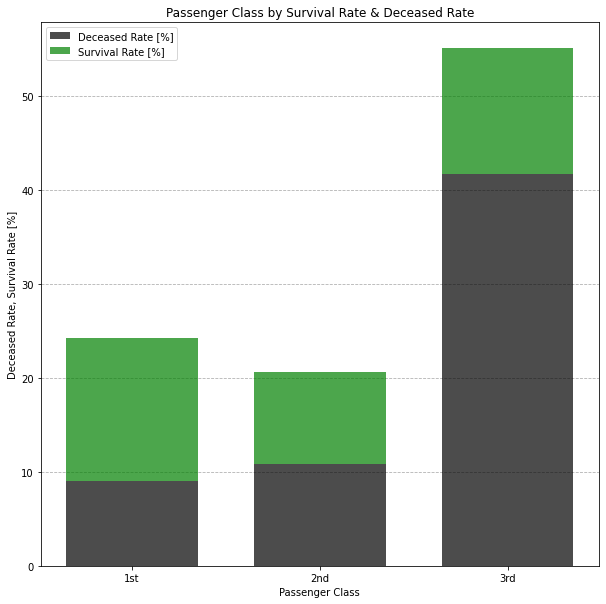

In [10]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title('Passenger Class by Survival Rate & Deceased Rate')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Deceased Rate, Survival Rate [%]')
ax1.bar(labels, pclass_survival_rate[0], width=0.7, alpha=0.7, label='Deceased Rate [%]', color='black')
ax1.bar(labels, pclass_survival_rate[1], width=0.7, alpha=0.7, label='Survival Rate [%]', color='green', bottom=pclass_survival_rate[0])
ax1.set_axisbelow(True) # grid in background
ax1.yaxis.grid(True, linestyle='--')
ax1.legend()

<p><b>Assessment result:</b></p>
<p>The passenger class has a significant impact on the Deceased Rate. A better chance to survive had a passenger in the 1st class, while the Deceased Rate was very high in the 3rd class.</p> 

<h3>Feature: Gender</h3>
<p>We'll determine which proportion of passengers survived based on their gender.</p>

In [11]:
ds = pd.crosstab(dataset['Sex'], dataset['Survived'])
total =  ds.sum().sum()
gender_survival_rates = (ds / total) * 100
labels = list(gender_survival_rates.index)

NameError: name 'gender_survival_rate' is not defined

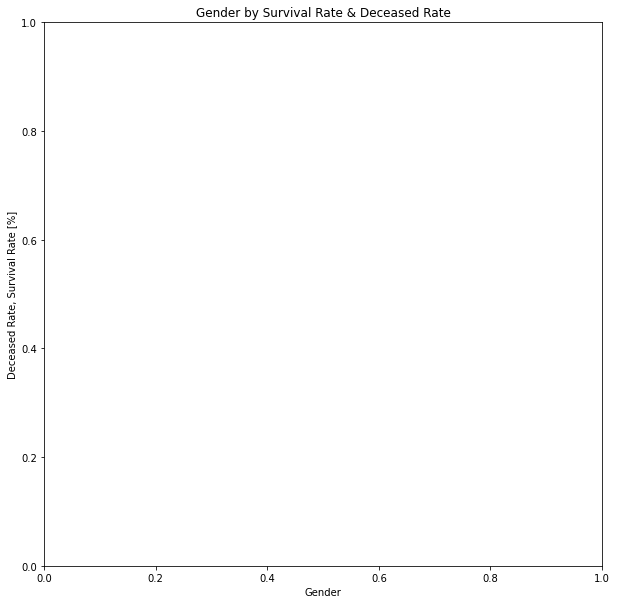

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title('Gender by Survival Rate & Deceased Rate')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Deceased Rate, Survival Rate [%]')
ax1.bar(labels, gender_survival_rate[0], width=0.7, alpha=0.7, label='Deceased Rate [%]', color='black')
ax1.bar(labels, gender_survival_rate[1], width=0.7, alpha=0.7, label='Survival Rate [%]', color='green', bottom=gender_survival_rate[0])
ax1.set_axisbelow(True) # grid in background
ax1.yaxis.grid(True, linestyle='--')
ax1.legend()

<p><b>Assessment result:</b></p>
<p>The Gender has a significant impact on both rates. Females had a better chance to survive, while the Deceased Rate was very high for men.</p> 

<h3>Feature: Port of Embarkation</h3>
<p>We'll determine which proportion of passengers survived based on their embarkation port.</p>

<p>Missing data points</p>

In [ ]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<p>We'll determine which proportion of passengers survived based on their embarked port.</p>

In [ ]:
ds = pd.crosstab(dataset['Embarked'], dataset['Survived'])
total =  ds.sum().sum()
embarked_survival_rates = (ds / total) * 100
labels = list(embarked_survival_rates.index)
labels

['C', 'Q', 'S']

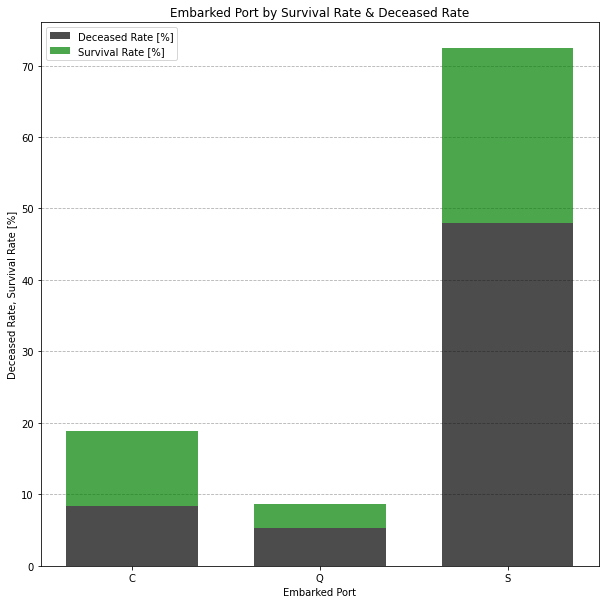

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Embarked Port by Survival Rate & Deceased Rate')
ax.set_xlabel('Embarked Port')
ax.set_ylabel('Deceased Rate, Survival Rate [%]')
ax.bar(labels, embarked_survival_rates[0], width=0.7, alpha=0.7, label='Deceased Rate [%]', color='black')
ax.bar(labels, embarked_survival_rates[1], width=0.7, alpha=0.7, label='Survival Rate [%]', color='green', bottom=embarked_survival_rates[0])
ax.set_axisbelow(True) # grid in background
ax.yaxis.grid(True, linestyle='--')
ax.legend()

<h3>Feature: Age</h3>
<p>We'll determine which proportion of passengers survived based on their age.</p>

<p>Missing data points</p>

In [ ]:
dataset[dataset['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


/tmp/ipykernel_126332/1932124833.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  age_survival = np.array([age_deceased, age_survived])


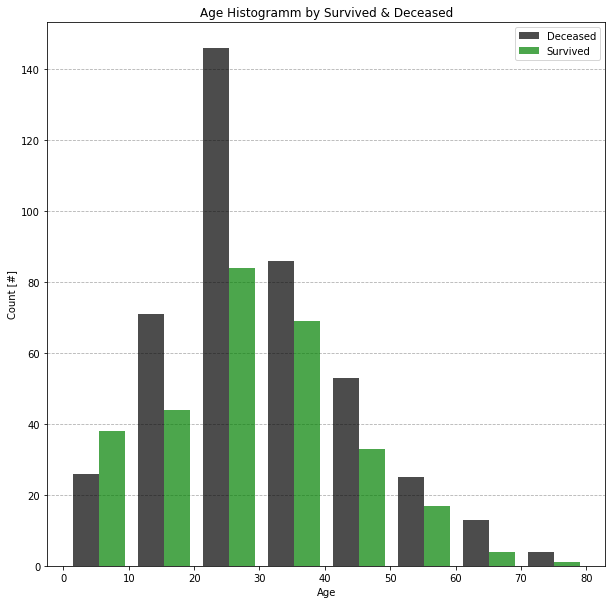

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Age Histogramm by Survived & Deceased')
ax.set_xlabel('Age')
ax.set_ylabel('Count [#]')

numbins = int(dataset['Age'].max() / 10) 

age_deceased = dataset[dataset['Survived'] == 0]['Age'].dropna().to_list()
age_survived = dataset[dataset['Survived'] == 1]['Age'].dropna().to_list()
age_survival = np.array([age_deceased, age_survived])

# n, bins, patches = ax.hist(age_survival, bins=numbins, alpha=0.7, color=["black", "green"], histtype='bar', stacked=True)
n, bins, patches = ax.hist(age_survival, bins=numbins, alpha=0.7, histtype='bar', color=["black", "green"], label=['Deceased','Survived'])
del n, bins, patches
ax.set_axisbelow(True) # grid in background
ax.yaxis.grid(True, linestyle='--')
ax.legend()